In [527]:
import YouTube_Data_Story as ds
import YouTube_Data_Wrangling as dw
from matplotlib.gridspec import GridSpec
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import requests
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from scipy import stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import warnings
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings('ignore')

In [608]:
#DataFrames
df_usa=dw.combined_usa_mx_df[dw.combined_usa_mx_df.country=='USA']
df_mx=dw.combined_usa_mx_df[dw.combined_usa_mx_df.country=='Mexico']

#DF Views
df_usa_views=df_usa['views']
df_mx_views=df_mx['views']

#DF Likes
df_usa_likes=df_usa['likes']
df_mx_likes=df_mx['likes']

#DF Dislikes
df_usa_dlikes=df_usa['dislikes']
df_mx_dlikes=df_mx['dislikes']

#DF Comment Count
df_usa_comment=df_usa['comment_count']
df_mx_comment=df_mx['comment_count']

df_usa_views_log=np.log10(df_usa['views']+1)
df_usa_likes_log=np.log10(df_usa['likes']+1)
df_usa_dlikes_log=np.log10(df_usa['dislikes']+1)
df_usa_comments_log=np.log10(df_usa['comment_count']+1)

#Shows in USA
shows_usa_df=dw.combined_usa_mx_df.loc[dw.combined_usa_mx_df.category_name=='Shows']


In [644]:
#FUNCTIONS:

def ecdf(data):
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    _=plt.plot(x,y,marker='.',linestyle='none') 

def vertical_line(axes,number,label, color, text_place):
    axes.axvline(number, color=color, linestyle=':', label=label, lw=2.5)
    axes.text(number,text_place,'{:,.2f}M' .format(number/1000000),rotation=90, fontsize=15)
    axes.legend(loc=0)
    #_=plt.axvline(number, color=color, linestyle=':', label=label, lw=2.5)
    #_=plt.text(number,text_place,'{:,.2f}M' .format(number/1000000),rotation=90, fontsize=15)

def draw_bs_reps(data,func,size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_samples=np.random.choice(data, len(data))
        bs_replicates[i]=func(bs_samples)
    return bs_replicates

def histo(axes,df,title,x_label,y_label,xlim,bins=20, density=False, histtype='bar'):
    df.plot.hist(ax=axes,bins=bins,density=density)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(title)
    

    #_=plt.hist(df, bins=bins,density=density,ax=axes)
    #_=plt.xlabel(x_label)
    #_=plt.ylabel(y_label)
    #_=plt.title(title)
    if xlim != 0:
        axes.set_xlim([0, xlim])
                       #20 million 
    plt.tight_layout()
    #print('Confidence interval (95%) for population mean is [{:,.2f}M'.format(CI_95_usa_views_mean[0]/1000000) + ' ,{:,.2f}M]'.format(CI_95_usa_views_mean[1]/1000000))
        
def samplestats(df,percent):
    mean=np.mean(df)
    std=np.std(df,ddof=1)
    median=np.median(df)
    percentile=np.percentile(df,percent)
    return mean,std,median,percentile

####  Scenario 1:
For YouTube (Client) to consider investing properly in people, infrastructure etc, they need to know audience engagement with the videos in both countries. 
For this they need to know the views/likes/dislikes/comment_count distribution and a 95% confidence interval around the population mean. 
We consider df_usa_views to be a sample and we are inferening population statistics for all the video views across all categories in USA. 


________________________________________________
USA SAMPLE STATISTICS - VIEWS
________________________________________________
.95% of the views are under: 8.89M
.Other statistics of the views in the USA:
.Sample Mean= 2.33M
.Sample Standard Error = 7.26M
.Sample Median= 0.67M
.The PEAK of the distribution is closer to it's median 0.67M, rather than mean 2.33M
...This is expected behavior from a left skewed distribution
________________________________________________
Mexico SAMPLE STATISTICS - VIEWS
________________________________________________
.95% of the views are under: 1.19M
.Other statistics of the views in the Mexico:
.Sample Mean= 0.33M
.Sample Standard Error = 1.45M
.Sample Median= 0.06M


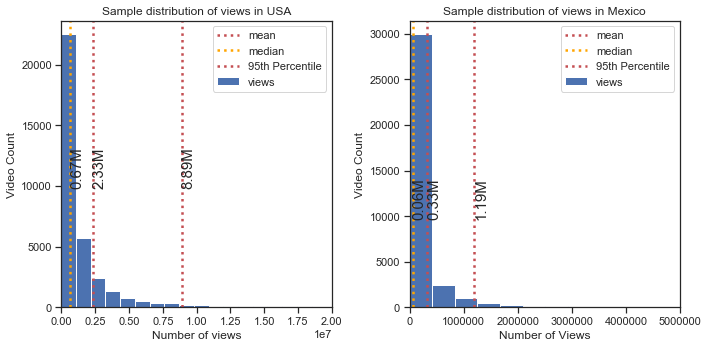

In [643]:
#Finding sample statistics of the "views" in the USA/MX. Sample is the data provided in df_usa_views and df_mx_views

#1. Sample stats of df_usa_views

mean_views_usa,std_views_usa,median_views_usa,percentile_views_usa= samplestats(df_usa_views,95)

# 2. Plotting hist distribution of sample df_usa_views
#Almost all of the videos in USA got views under 20 million mark therefore I set the xlim(0, 20Million)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
histo(axes[0],df_usa_views,title='Sample distribution of views in USA', x_label='Number of views',y_label='Video Count',xlim=20000000,bins=200)
#Plotting Mean vertical line
vertical_line(axes[0],mean_views_usa, 'mean', 'r', 10000)
#Plotting Median vertical line
vertical_line(axes[0],median_views_usa, 'median', 'orange', 10000)
#Plotting 95th percentile
vertical_line(axes[0],percentile_views_usa, '95th Percentile', 'r',10000)

#1. Sample stats of df_mx_views
mean_views_mx,std_views_mx,median_views_mx,percentile_views_mx= samplestats(df_mx_views,95)

# 2. Plotting hist distribution of sample df_mx_views

histo(axes[1],df_mx_views,title='Sample distribution of views in Mexico',x_label= 'Number of Views',y_label='Video Count',xlim=5000000,bins=150)
#Plotting Mean vertical line
vertical_line(axes[1],mean_views_mx, 'mean', 'r', 10000)
#Plotting Median vertical line
vertical_line(axes[1],median_views_mx, 'median', 'orange', 10000)
#Plotting 95th percentile
vertical_line(axes[1],percentile_views_mx, '95th Percentile', 'r',10000)

#Commentary
print('________________________________________________')
print("USA SAMPLE STATISTICS - VIEWS")
print('________________________________________________')
print(".95% of the views are under: " + '{:,.2f}M' .format(percentile_views_usa/1000000))
print(".Other statistics of the views in the USA:")
print('.Sample Mean= {:,.2f}M'.format(mean_views_usa/1000000))
print('.Sample Standard Error = {:,.2f}M'.format(std_views_usa/1000000))
print('.Sample Median= {:,.2f}M'.format(median_views_usa/1000000))
print(".The PEAK of the distribution is closer to it's median {:,.2f}M, rather than mean {:,.2f}M".format(median_views_usa/1000000, mean_views_usa/1000000))
print("...This is expected behavior from a left skewed distribution")
print('________________________________________________')
print("Mexico SAMPLE STATISTICS - VIEWS")
print('________________________________________________')
print(".95% of the views are under: " + '{:,.2f}M' .format(percentile_views_mx/1000000))
print(".Other statistics of the views in the Mexico:")
print('.Sample Mean= {:,.2f}M'.format(mean_views_mx/1000000))
print('.Sample Standard Error = {:,.2f}M'.format(std_views_mx/1000000))
print('.Sample Median= {:,.2f}M'.format(median_views_mx/1000000))
#print(".The PEAK of the distribution is closer to it's median {:,.2f}M, rather than mean {:,.2f}M".format(median/1000000, mean/1000000))
#print("...This is expected behavior from a left skewed distribution")



#### Statistical Inference about Views in USA and Mexico:
1.Calculating 95% CI around the USA videos views [population mean (mean views of all YouTube videos watched in USA)]
2.Calculating 95% CI around the MExico videos views [population mean (mean views of all YouTube videos watched in Mexico)]

.I am going to take bootstrap inference approach here. Taking 10,000 bootstrap samples from the given usa views sample (df_usa_views) and calculating the mean of each.Repeat same process for mexico views sample (df_mx_views)

In [684]:
np.random.seed(47)
# USA Inference Views
# Creating bootstrap samples and taking their means

df_usa_views_mean_rep=draw_bs_reps(df_usa_views, np.mean,10000)
# Finding 95% Confidence Interval around population mean. 
CI_95_usa_views_mean=np.percentile(df_usa_views_mean_rep,[2.5,97.5])
df_usa_views_mean_rep=pd.DataFrame({'BS Mean Views': df_usa_views_mean_rep})

# MX Inference Views
# Creating bootstrap samples and taking their means
df_mx_views_mean_rep=draw_bs_reps(df_mx_views, np.mean,10000)
# Finding 95% Confidence Interval around population mean. 
CI_95_mx_views_mean=np.percentile(df_mx_views_mean_rep,[2.5,97.5])
df_mx_views_mean_rep=pd.DataFrame({'BS Mean Views': df_mx_views_mean_rep})

USA:Confidence interval (95%) for population mean is [2.25M ,2.41M]
Mexico:Confidence interval (95%) for population mean is [0.31M ,0.34M]


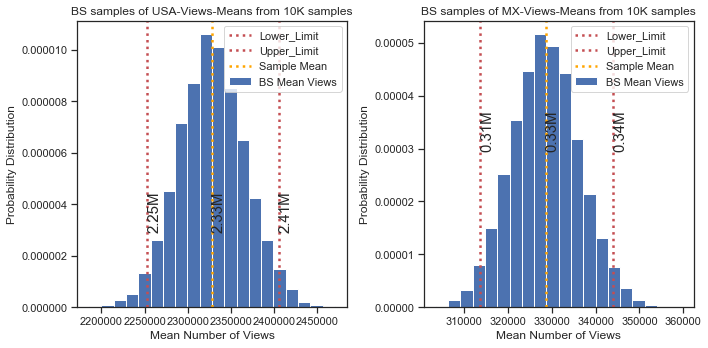

In [688]:

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
#USA
#Plotting the hist of the BS rep means and CI 
histo(axes[0],df_usa_views_mean_rep,"BS samples of USA-Views-Means from 10K samples","Mean Number of Views","Probability Distribution",xlim=0, bins=20, density=True, histtype='step')

#CI lines
vertical_line(axes[0],CI_95_usa_views_mean[0], 'Lower_Limit', 'r', 0.000003)
vertical_line(axes[0],CI_95_usa_views_mean[1], 'Upper_Limit', 'r', 0.000003)
#Mean line
vertical_line(axes[0],mean_views_usa, 'Sample Mean', 'orange', 0.000003)

#CI_95_usa_views_mean
print('USA:Confidence interval (95%) for population mean is [{:,.2f}M'.format(CI_95_usa_views_mean[0]/1000000) + ' ,{:,.2f}M]'.format(CI_95_usa_views_mean[1]/1000000))

############
#MX
#Plotting the hist of the BS rep means and CI 
histo(axes[1],df_mx_views_mean_rep,"BS samples of MX-Views-Means from 10K samples","Mean Number of Views","Probability Distribution",xlim=0, bins=20, density=True, histtype='step')

#CI lines
vertical_line(axes[1],CI_95_mx_views_mean[0], 'Lower_Limit', 'r', 0.00003)
vertical_line(axes[1],CI_95_mx_views_mean[1], 'Upper_Limit', 'r', 0.00003)
#Mean line
vertical_line(axes[1],mean_views_mx, 'Sample Mean', 'orange', 0.00003)

#CI_95_mx_views_mean
print('Mexico:Confidence interval (95%) for population mean is [{:,.2f}M'.format(CI_95_mx_views_mean[0]/1000000) + ' ,{:,.2f}M]'.format(CI_95_mx_views_mean[1]/1000000))




### Analysis of Scenario 1
.With the bootstrap inference, it can be concluded that there is a 95% chance that the population (all videos views) lie between 2.25M and 2.41M
.Assuming the sample acquired is random and 



####  Scenario 2:
.The shows category in USA data showed the most increment change (553%) {see data story ipnynb @/github.com/fariha23/YouTube_Data_Analysis_Video_Categories/} 
.YouTube would like to know how likely it is to see the views between the higher end of the views acquired by Shows category. Lets say they want to see how likely it is that a new Shows video will acquire between 1.2M - 1.4M views

In [417]:
temp=shows_usa_df['views']
shows_usa_views_df=temp.reset_index(drop=True)

(3673, 1445949, 816506.4, 1107598.0)

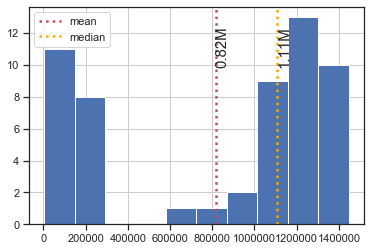

In [466]:
shows_usa_views_df.hist()

#Mean
vertical_line(shows_usa_views_df, np.mean, 'mean', 'r', 10)
#Median
vertical_line(shows_usa_views_df, np.median, 'median', 'orange', 10)
_=plt.legend(loc=0)

np.min(shows_usa_views_df), np.max(shows_usa_views_df), np.mean(shows_usa_views_df), np.median(shows_usa_views_df)

### Scenario 3
. Music is most viewed category in both Mexico and the USA. 
. USA being more populated then MX, # of views (or average views) will be greater than Mexico but how much of a difference in all views we are talking about? 
. How does the standard deviation of the differences between music category 

62796390

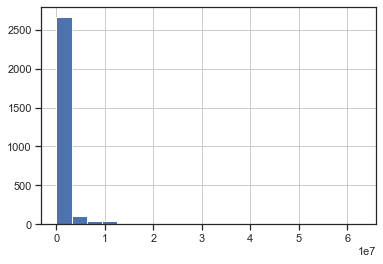

In [508]:
temp=df_mx.reset_index(drop=True)
df_mx=temp
df_mx_music=df_mx[df_mx.category_name=='Music']
temp=df_mx_music.reset_index(drop=True)
df_mx_music=temp
temp1=df_mx_music['views']
df_mx_music_views=temp1.reset_index(drop=True)
df_mx_music_views.hist(bins=20)
np.max(df_mx_music_views)

217750076

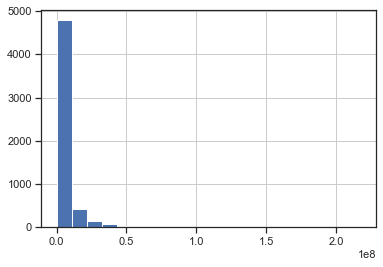

In [507]:
df_usa_music=df_usa[df_usa.category_name=='Music']
temp=df_usa_music.reset_index(drop=True)
df_usa_music=temp
temp1=df_usa_music['views']
df_usa_music_views=temp1.reset_index(drop=True)
df_usa_music_views.hist(bins=20)
np.max(df_usa_music_views)

In [515]:
#Difference in STD of MX and USA views data as it is
diff_std=np.std(df_usa_music_views) - np.std(df_mx_music_views)
diff_std

11602523.635781685

95% confidence interval is:  [ 9933684.30756575 13244289.87802714]


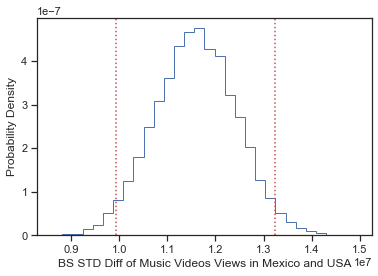

In [517]:
np.random.seed(47)
N_rep = 10000

usa_bs_std_reps=draw_bs_reps(df_usa_music_views,np.std,10000)
mx_bs_std_reps=draw_bs_reps(df_mx_music_views, np.std,10000)

diff_std_bs_reps=usa_bs_std_reps - mx_bs_std_reps

conf_std_bs_reps=np.percentile(diff_std_bs_reps,[2.5,97.5])

_=plt.hist(diff_std_bs_reps,bins=30,density=True, histtype='step')
_=plt.xlabel('BS STD Diff of Music Videos Views in Mexico and USA')
_=plt.ylabel('Probability Density')
plt.axvline(conf_std_bs_reps[0], color='r', linestyle = ':')
plt.axvline(conf_std_bs_reps[1], color='r', linestyle = ':')

print('95% confidence interval is: ', conf_std_bs_reps)



In [ ]:
# SCRATCH PAD
### print('.Margin_Error= {:,.2f}M'.format(ME/1000000))
### print('.CI_left= {:,.2f}M'.format(CI_lower_end/1000000))
### print('>>>>>>>>>>>>>>>')

#2. Using t-table (because it's one sided hist) calculating ME, CI
#Keeping alpha = 0.05

#p=0.05
#size=len(df_usa)
#df=size -1
#t_critical = t.ppf(p, df)

#SE=std/np.sqrt(size)
#ME=t_critical * SE
#CI_lower_end=mean+ME